In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from astropy.io import fits 

data = fits.open('GOGREEN_goodz_zcat_v1.0.fits')
print(data)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x10dc6ceb8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x10dcfe208>]


In [2]:
print(data[1])
data.info()
data[1].columns

Filename: GOGREEN_goodz_zcat_v1.0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                BinTableHDU     90   1550R x 25C   [15A, 1J, 1J, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


ColDefs(
    name = 'Cluster'; format = '15A'; disp = 'A15'
    name = 'PHOTID'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'SPECID'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'EXTVER'; format = '1I'; null = -32767; disp = 'I11'
    name = 'RA(J2000)'; format = '1E'; unit = 'deg'; disp = 'G15.7'
    name = 'DEC(J2000)'; format = '1E'; unit = 'deg'; disp = 'G15.7'
    name = 'ZMAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'EZMAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'SNR_8500_VAR'; format = '1E'; disp = 'G15.7'
    name = 'SNR_8500_RMS'; format = '1E'; disp = 'G15.7'
    name = 'IRAC1MAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'EIRAC1MAG_TOTAL'; format = '1E'; disp = 'G15.7'
    name = 'OBJClass'; format = '1I'; null = -32767; disp = 'I11'
    name = 'Redshift'; format = '1E'; disp = 'G15.7'
    name = 'Redshift_Quality'; format = '1I'; null = -32767; disp = 'I11'
    name = 'Mass'; format = '1E'; disp = 'G15.7'
    name = 'EMa

In [3]:
catdata = data[1].data

In [4]:
catdata[1]

('COSMOS-125', 81508, 114081508, 2, 150.6097, 2.1341491, 23.310665, 0.077542014, 2.8628709, 1.8293086, 21.501059, 0.10681412, 1, 1.13177, 4, 10.381105, 1.1289968, 1.2377292, 0.085456342, 52.396397, 9906.9033, 0.064620651, 42252.883, -1.0, -1.0)

In [5]:
catdata[:]

FITS_rec([ ('COSMOS-125', 81258, 114081258, 1, 150.59691, 2.1294534, 22.860359, 0.047039807, 4.7547464, 3.2849386, 22.017117, 0.13531868, 1, 0.72447002, 3, nan, nan, nan, nan, nan, nan, nan, nan, -1.0, -1.0),
       ('COSMOS-125', 81508, 114081508, 2, 150.6097, 2.1341491, 23.310665, 0.077542014, 2.8628709, 1.8293086, 21.501059, 0.10681412, 1, 1.13177, 4, 10.381105, 1.1289968, 1.2377292, 0.085456342, 52.396397, 9906.9033, 0.064620651, 42252.883, -1.0, -1.0),
       ('COSMOS-125', 81650, 114081650, 3, 150.63072, 2.1355174, 23.217016, 0.064109735, 3.3562014, 2.1561184, 21.13615, 0.08978042, 1, 1.68603, 4, nan, nan, nan, nan, nan, nan, nan, nan, -1.0, -1.0),
       ...,
       ('SpARCS1638', 1042, 212060893, 188, 249.72237, 40.635429, 22.974001, 0.0, 2.2042015, 1.1372991, 22.409, 0.0, 4, 1.189, 4, 2.4813666, 0.24813667, 0.91621512, 0.093773164, 74.59948, 4071.2869, 3.7680135, 81333.531, 1.0, 1.0),
       ('SpARCS1638', 1074, 212060903, 189, 249.63921, 40.636818, 99.989998, 0.0, 6.6713634, 

In [6]:
z = catdata['Redshift']
SpecID = catdata['SPECID']
len(z)
len(SpecID)

1550

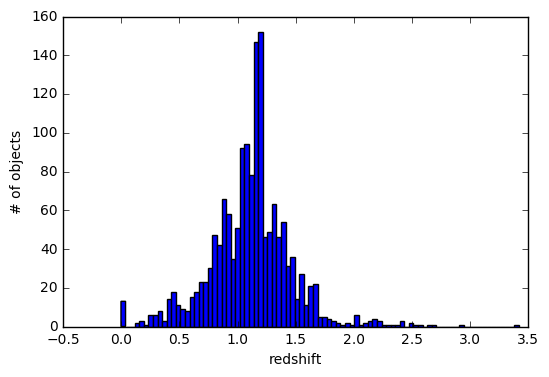

In [10]:
nbins = int((3.5 - 0) / 0.04)
hist = plt.hist(z,bins=nbins)
hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
plt.show()

/Users/grudnick/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


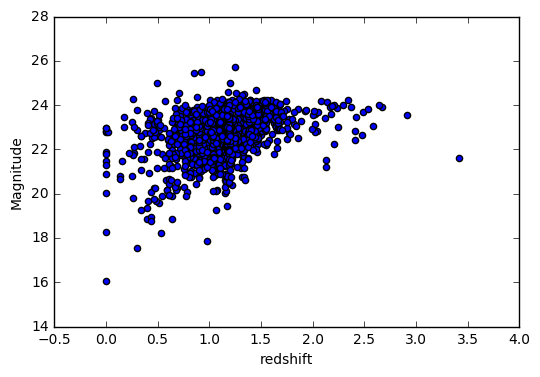

In [12]:
igoodz = np.where(catdata['ZMAG_TOTAL']<40.)
#m = catdata['ZMAG_TOTAL'][igoodz]
#print(m)
zmagVSred = plt.scatter(catdata['Redshift'][igoodz],catdata['ZMAG_TOTAL'][igoodz])
zmagVSred = plt.xlabel('redshift')
zmagVSred = plt.ylabel('Magnitude')
plt.show()

In [32]:
cluststr = 'SPT2106'
#i = np.where(catdata['cluster']=='COSMOS-221')
i = np.where(catdata['cluster']==cluststr)

In [33]:
print(catdata['redshift'][i])

[ 0.81550002  0.77859002  1.1415      1.13231003  1.13361001  1.12039006
  1.47843003  0.77987999  1.11366999  1.12795997  1.12820005  1.18860996
  1.06089997  1.11231005  1.13885999  1.11722004  1.11325002  1.13099003
  1.12504995  1.12338996  1.11853004  1.11167002  0.90732998  1.49958003
  1.13826001  0.92045999  1.10992002  1.11177003  1.12959003  1.34122002
  1.12030995  1.13590002  1.12536001  1.13064003  1.25633001  1.13472998
  1.42244995  1.14461005  0.97092003  1.19088995  1.11794996  1.62728
  0.78244001  1.12337005  1.34359002  0.86751002  1.13194001  1.13862002
  0.49081001  1.02119005  1.28927004  1.28920996  1.06626999  1.12181997
  2.13421011]


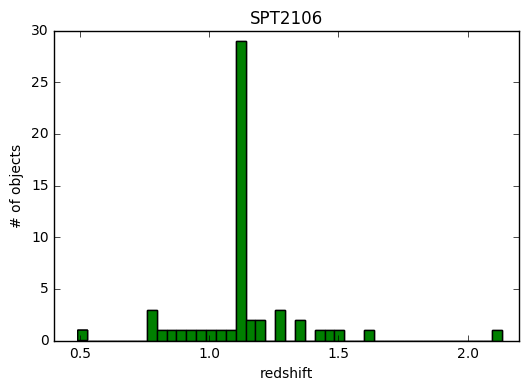

In [34]:
nbins = int((1.75 - 0) / 0.04)
hist = plt.hist(catdata['redshift'][i],bins=nbins)
hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
hist = plt.title(cluststr)
plt.show()

In [27]:
#s = np.where(catdata['cluster'][27:63])
#print(catdata['redshift'][s])
print(catdata['redshift'][27:63])

[ 1.09322     0.61418998  1.25971997  0.90241998  1.01830995  1.63636994
  0.87167001  0.75005001  0.79593998  1.20615995  0.87884998  1.19626999
  0.84852999  1.19763994  0.80176002  1.25983     0.99962002  1.09784997
  1.43697     0.88128     0.88181001  0.98313999  0.87997001  0.87722999
  1.14602995  1.43743002  1.43885005  0.92197001  0.81594002  1.14485002
  1.19468999  1.19387996  1.19658995  1.04338002  1.15922999  1.14312005]


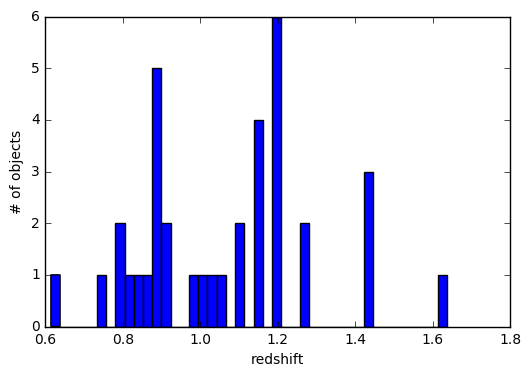

In [29]:
#hist = plt.hist(catdata['redshift'][s])
hist = plt.hist(catdata['redshift'][27:63],bins=nbins)

hist = plt.xlabel('redshift')
hist = plt.ylabel('# of objects')
plt.show()

In [42]:
restframe_colors = '/Users/taylorplattner/Work/GoGreen/Data/Releases/v1.0/v1.0/PHOTOMETRY/RESTFRAME_COLOURS/RESTFRAME_MASTER_SPTCL-0205.cat'
t = Table.read(restframe_colors, format='ascii')  
print(t)

PHOTID REDSHIFTUSED  FUV     NUV      U       B       V       J    UMINV VMINJ 
------ ------------ ------ ------- ------- ------- ------- ------- ----- ------
     1         1.32  -99.0   -99.0   -99.0   -99.0   -99.0   -99.0  -0.0   -0.0
     2         1.32  -99.0   -99.0   -99.0   -99.0   -99.0   -99.0  -0.0   -0.0
     3         1.32  -99.0   -99.0   -99.0   -99.0   -99.0   -99.0  -0.0   -0.0
     4         1.32 0.4258  4.6742 30.6588 54.6825 65.8326  110.88  0.83  0.566
     5         1.32 0.9238  2.5429 20.9557 39.8791 58.6847 134.809 1.118  0.903
     6         1.32 4.1033 12.4784 35.8376 49.3864 53.6477 76.5784 0.438  0.386
     7         1.32 2.7377  4.8748 26.5743 40.8136 51.5376 94.7943 0.719  0.662
     8         1.32 0.3221  1.0233   6.986 16.2704 27.1191 61.0397 1.473  0.881
     9         1.32 2.8114  5.6295  15.915 27.0033  34.153 92.5396 0.829  1.082
    10         1.32 6.1544 74.1417 519.129 965.583 753.188 986.308 0.404  0.293
   ...          ...    ...     ...     .

In [43]:
k_band = '/Users/taylorplattner/Work/GoGreen/Data/Releases/v1.0/v1.0/PHOTOMETRY/PHOTOM_CATS/SPTCL-0205_totalall_FOURSTARKs.cat'
t = Table.read(k_band, format='ascii')  
print(t)

 id      ra       dec       xpix    ypix  ... IRAC1  eIRAC1  IRAC2  eIRAC2
---- --------- ---------- ------- ------- ... ------ ------ ------- ------
   1  31.51347 -58.554588   801.2   209.7 ... -999.0 9999.0  514.35   5.62
   2  31.59111 -58.559471   72.34   120.6 ... -999.0 9999.0  75.036  5.217
   3 31.576328 -58.562344  211.23   69.19 ... -999.0 9999.0 134.231  3.976
   4 31.426998 -58.563847 1613.17   43.45 ... -999.0 9999.0  29.216  1.384
   5 31.584105 -58.563942  138.28    40.3 ... -999.0 9999.0  48.816  3.737
   6 31.367729 -58.564213 2169.57   36.49 ... -999.0 9999.0  17.158  2.529
   7 31.543238 -58.564404  521.94    32.7 ... -999.0 9999.0  24.702  1.192
   8 31.345232 -58.564522 2380.77   30.73 ... -999.0 9999.0  31.133  3.335
   9 31.346769 -58.564514 2366.33   30.84 ... -999.0 9999.0  65.464  4.884
  10 31.326389 -58.564663 2557.65   27.87 ... -999.0 9999.0  -999.0 9999.0
 ...       ...        ...     ...     ... ...    ...    ...     ...    ...
2427 31.380739 -58.454151